# Information Theory 
This notebook is used for notes.

#### Shannons entropy 
In information theory unpredictability is measured by means of Shannon's entropy this is defined as: 

Given a discrete random variable $X$ that can take on possible values such as $\{x_1,\dots,x_N\}$ it is then calculated as:
\begin{equation}
H(X) = - \sum_{i=1}^{N} p(x_i) \log_2 p(x_i) 
\end{equation}
This can also be calculated using python for our datasets:

In [1]:
# Import statements
import os
import sys
import numpy as np
# Import local code
bachelorpath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
scriptpath = bachelorpath + '/scripts/'
sys.path.insert(0, scriptpath)
import BP_ratio as bp
import dataset_plotting as dp
import motion_blur as mb 
import imu_accel as imu_accel

In [2]:
# Below function implements shannons entropy for a given list.
def calculate_shannon_entropy(data):
    N = len(data)
    counts = {}
    for i in data:
        if i not in counts:
            counts[i] = 0
        counts[i] += 1
    entropy = 0
    for count in counts.values():
        probability = count / N
        entropy -= probability * np.log2(probability)
    return entropy

## Deployed on Datasets
Lets start by deploying this algorithm upon EuRoC.

In [9]:
data_mb_euroc_mh1 = mb.load_euroc_dataset(True)
for i in data_mb_euroc_mh1:
    print(calculate_shannon_entropy(i))

Scanning next folder current total of images processed:  3682
Scanning next folder current total of images processed:  7364
11.84627391135028
11.84627391135028


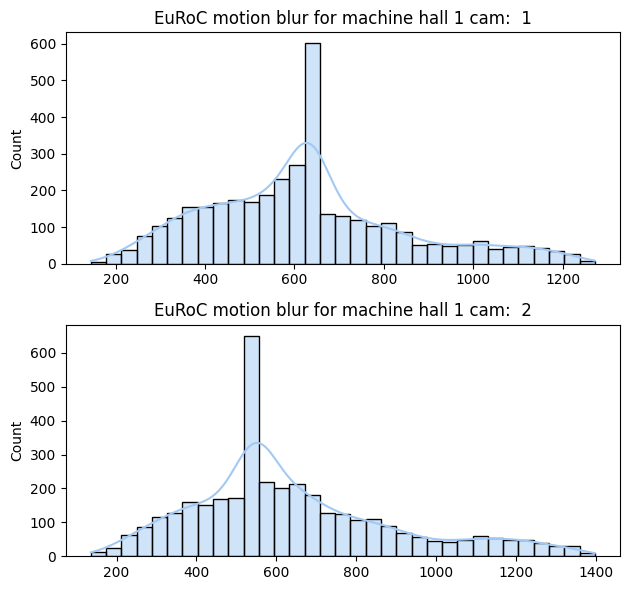

In [10]:
dp.create_b_histogram_aqualoc(data_mb_euroc_mh1, "EuRoC motion blur for machine hall 1 cam:")

In [14]:
data_mb_euroc_mh4 = mb.load_euroc_dataset(True)
for i in data_mb_euroc_mh4:
    print(calculate_shannon_entropy(i))

Scanning next folder current total of images processed:  2033
Scanning next folder current total of images processed:  4065
10.989394499844774
10.988684686772519


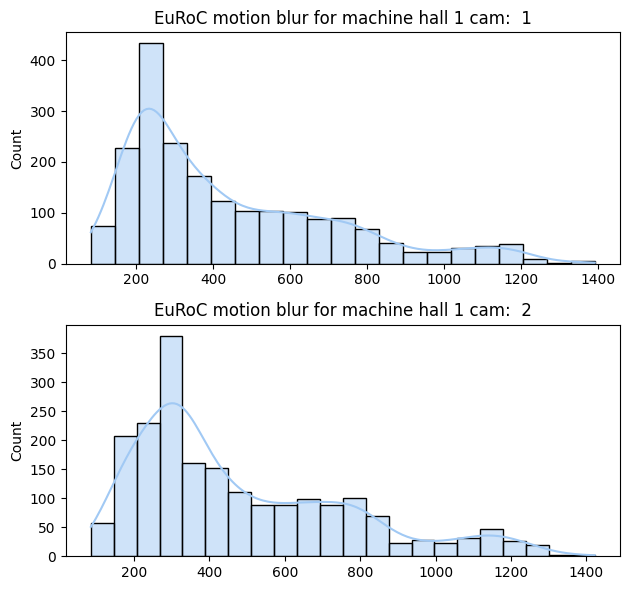

In [13]:
dp.create_b_histogram_aqualoc(data_mb_euroc_mh4, "EuRoC motion blur for machine hall 4 cam:")

In [4]:
data_mb_euroc_mh5 = mb.load_euroc_dataset(True)
for i in data_mb_euroc_mh5:
    print(calculate_shannon_entropy(i))

Scanning next folder current total of images processed:  2273
Scanning next folder current total of images processed:  4546
11.150381968817305
11.150381968817305


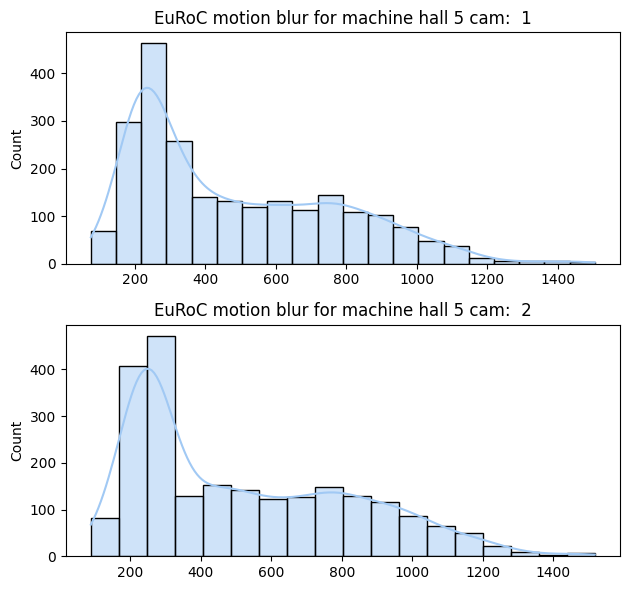

In [8]:
dp.create_b_histogram_aqualoc(data_mb_euroc_mh5, "EuRoC motion blur for machine hall 5 cam:")

Can also deploy on AQUALOC:

In [5]:
data_mb_aqualoc = mb.load_aqualoc_dataset()

Scanning next folder current total of images processed:  4586
Scanning next folder current total of images processed:  12728
Scanning next folder current total of images processed:  17879
Scanning next folder current total of images processed:  22004
Scanning next folder current total of images processed:  25462
Scanning next folder current total of images processed:  27999
Scanning next folder current total of images processed:  30260


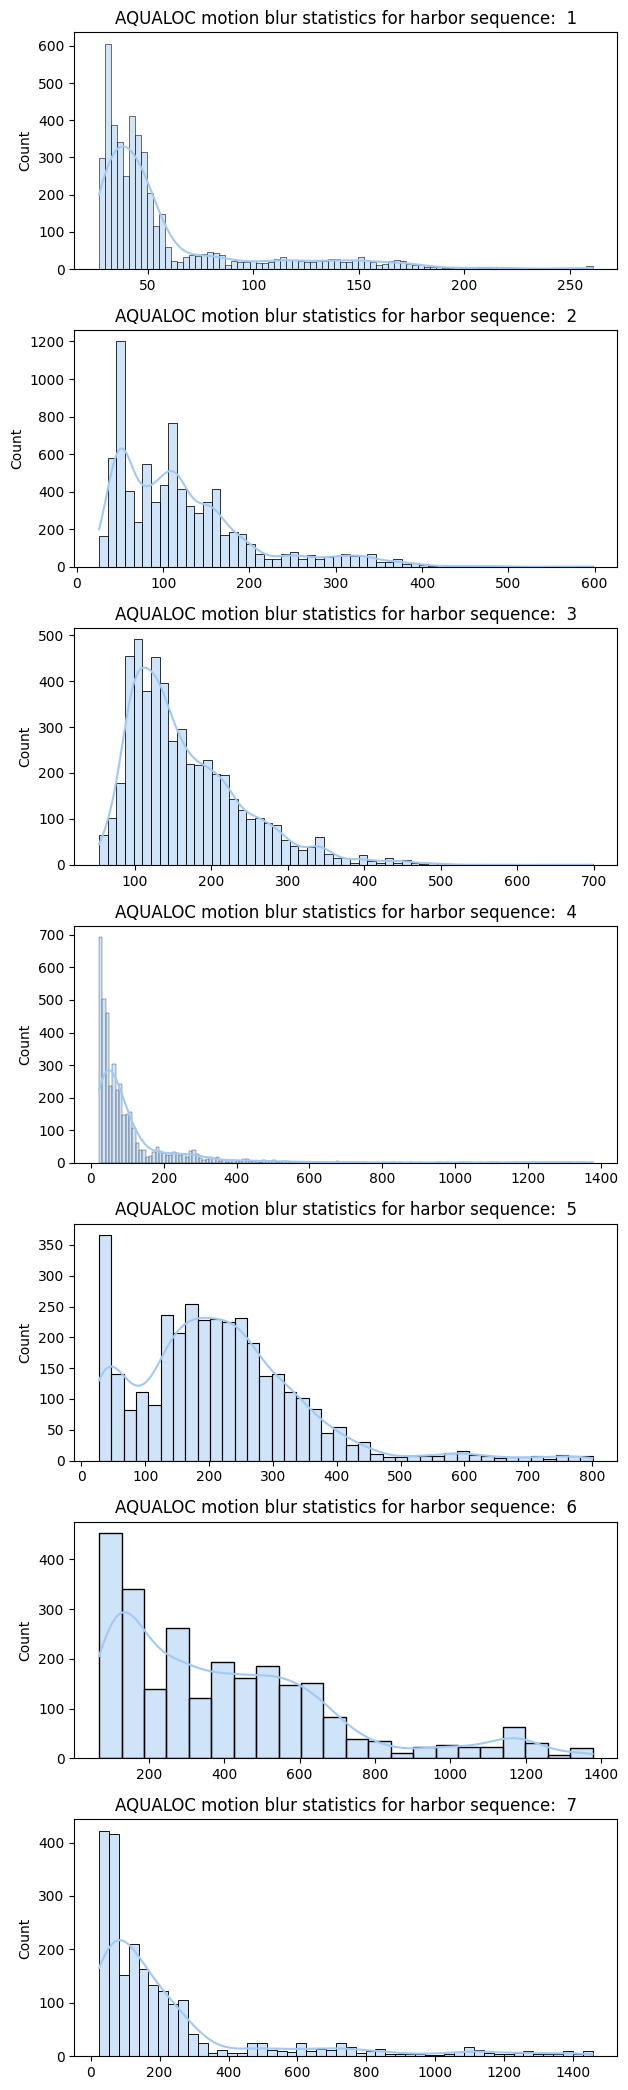

In [6]:
dp.create_b_histogram_aqualoc(data_mb_aqualoc, "AQUALOC motion blur statistics for harbor sequence:")

In [7]:
for i in data_mb_aqualoc:
    print(calculate_shannon_entropy(i))

12.16302063958039
12.991167506141776
12.330636824723998
12.010178404019786
11.755722153642415
11.308907804063765
11.142745276751999


# Kullback Leibler Divergence 


Can find relative entropy between two distrubutions $p$ and $q$ given by:

\begin{equation}
D(p\|q) = \sum_{j=1}^J p(y_j) \log{ \frac{p(y_j)}{q(y_j)}}
\end{equation}